In [2]:
import tensorflow as tf
print('TensorFlow :', tf.__version__)

TensorFlow : 2.9.1


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras_preprocessing import image
from shutil import copyfile

import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
import pathlib

In [4]:
DATASET_PATH = './dataset/'

os.listdir(DATASET_PATH)

['Normal',
 'Nodules',
 '.ipynb_checkpoints',
 'Pustules',
 'acne',
 'Whitehead',
 'Papule',
 'Blackhead']

In [5]:
print('Papula:', len(os.listdir('./dataset/Papule')))
print('Whitehead:', len(os.listdir('./dataset/Whitehead')))
print('Pustula:', len(os.listdir('./dataset/Pustules')))
print('Blackhead:', len(os.listdir('./dataset/Blackhead')))
print('Nodule:', len(os.listdir('./dataset/Nodules')))
print('Normal:', len(os.listdir('./dataset/Normal')))

Papula: 50
Whitehead: 56
Pustula: 129
Blackhead: 51
Nodule: 59
Normal: 100


In [6]:
def split_data(SOURCE, TRAINING, TESTING, VALIDATION, SPLIT_SIZE):
    if not os.path.exists(TRAINING): 
        os.makedirs(TRAINING) 
                
    if not os.path.exists(TESTING): 
        os.makedirs(TESTING) 
        
    if not os.path.exists(VALIDATION): 
        os.makedirs(VALIDATION)

    file_names = os.listdir(SOURCE) 
    file_number = len(file_names) 

    for index, file in enumerate(file_names): 
        if index < SPLIT_SIZE * file_number: 
            if index < 0.8 * file_number:
                copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
            else:
                copyfile(os.path.join(SOURCE, file), os.path.join(VALIDATION, file))
        else: 
            copyfile(os.path.join(SOURCE, file), os.path.join(TESTING, file))
        
PAPULA_SOURCE_DIR = './dataset/Papule'
WHITEHEAD_SOURCE_DIR = './dataset/Whitehead'
PUSTULA_SOURCE_DIR = './dataset/Pustules'
BLACKHEAD_SOURCE_DIR = './dataset/Blackhead'
NODUL_SOURCE_DIR = "./dataset/Nodules"
NORMAL_SOURCE_DIR = "./dataset/Normal"

TRAINING_PAPULA_DIR = "./dataset/acne/training/papula"
TRAINING_WHITEHEAD_DIR = "./dataset/acne/training/whitehead"
TRAINING_PUSTULA_DIR = "./dataset/acne/training/pustula"
TRAINING_BLACKHEAD_DIR = "./dataset/acne/training/blackhead"
TRAINING_NODUL_DIR = "./dataset/acne/training/nodul"
TRAINING_NORMAL_DIR = "./dataset/acne/training/normal"

TESTING_PAPULA_DIR = "./dataset/acne/testing/papula"
TESTING_WHITEHEAD_DIR = "./dataset/acne/testing/whitehead"
TESTING_PUSTULA_DIR = "./dataset/acne/testing/pustula"
TESTING_BLACKHEAD_DIR = "./dataset/acne/testing/blackhead"
TESTING_NODUL_DIR = "./dataset/acne/testing/nodul"
TESTING_NORMAL_DIR = "./dataset/acne/testing/normal"

VALIDATION_PAPULA_DIR = "./dataset/acne/validation/papula"
VALIDATION_WHITEHEAD_DIR = "./dataset/acne/validation/whitehead"
VALIDATION_PUSTULA_DIR = "./dataset/acne/validation/pustula"
VALIDATION_BLACKHEAD_DIR = "./dataset/acne/validation/blackhead"
VALIDATION_NODUL_DIR = "./dataset/acne/validation/nodul"
VALIDATION_NORMAL_DIR = "./dataset/acne/validation/normal"

split_size = .9
split_data(PAPULA_SOURCE_DIR, TRAINING_PAPULA_DIR, TESTING_PAPULA_DIR, VALIDATION_PAPULA_DIR, split_size)
split_data(WHITEHEAD_SOURCE_DIR, TRAINING_WHITEHEAD_DIR, TESTING_WHITEHEAD_DIR, VALIDATION_WHITEHEAD_DIR, split_size)
split_data(PUSTULA_SOURCE_DIR, TRAINING_PUSTULA_DIR, TESTING_PUSTULA_DIR, VALIDATION_PUSTULA_DIR, split_size)
split_data(BLACKHEAD_SOURCE_DIR, TRAINING_BLACKHEAD_DIR, TESTING_BLACKHEAD_DIR, VALIDATION_BLACKHEAD_DIR, split_size)
split_data(NODUL_SOURCE_DIR, TRAINING_NODUL_DIR, TESTING_NODUL_DIR, VALIDATION_NODUL_DIR, split_size)
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, TESTING_NORMAL_DIR, VALIDATION_NORMAL_DIR, split_size)

In [7]:
train_papula = os.listdir(TRAINING_PAPULA_DIR)
train_whitehead = os.listdir(TRAINING_WHITEHEAD_DIR)
train_pustula = os.listdir(TRAINING_PUSTULA_DIR)
train_blackhead = os.listdir(TRAINING_BLACKHEAD_DIR)
train_nodul = os.listdir(TRAINING_NODUL_DIR)
train_normal = os.listdir(TRAINING_NORMAL_DIR)

test_papula = os.listdir(TESTING_PAPULA_DIR)
test_whitehead = os.listdir(TESTING_WHITEHEAD_DIR)
test_pustula = os.listdir(TESTING_PUSTULA_DIR)
test_blackhead = os.listdir(TESTING_BLACKHEAD_DIR)
test_nodul = os.listdir(TESTING_NODUL_DIR)
test_normal = os.listdir(TESTING_NORMAL_DIR)

val_papula = os.listdir(VALIDATION_PAPULA_DIR)
val_whitehead = os.listdir(VALIDATION_WHITEHEAD_DIR)
val_pustula = os.listdir(VALIDATION_PUSTULA_DIR)
val_blackhead = os.listdir(VALIDATION_BLACKHEAD_DIR)
val_nodul = os.listdir(VALIDATION_NODUL_DIR)
val_normal = os.listdir(VALIDATION_NORMAL_DIR)

print("Training")
print('Papula :', len(train_papula))
print('Whitehead :', len(train_whitehead))
print('Pustula :', len(train_pustula))
print('Blackhead :', len(train_blackhead))
print('Nodul :', len(train_nodul))
print('Normal :', len(train_normal))

print("\nTesting")
print('Papula :', len(test_papula))
print('Whitehead :', len(test_whitehead))
print('Pustula :', len(test_pustula))
print('Blackhead :', len(test_blackhead))
print('Nodul :', len(test_nodul))
print('Normal :', len(test_normal))

print("\nValidation")
print('Papula :', len(val_papula))
print('Whitehead :', len(val_whitehead))
print('Pustula :', len(val_pustula))
print('Blackhead :', len(val_blackhead))
print('Nodul :', len(val_nodul))
print('Normal :', len(val_normal))

Training
Papula : 40
Whitehead : 45
Pustula : 104
Blackhead : 41
Nodul : 48
Normal : 80

Testing
Papula : 5
Whitehead : 5
Pustula : 12
Blackhead : 5
Nodul : 5
Normal : 10

Validation
Papula : 5
Whitehead : 6
Pustula : 13
Blackhead : 5
Nodul : 6
Normal : 10


In [8]:
BATCH_SIZE = 2
IMG_SIZE = (224, 224)

TRAINING_DIR = './dataset/acne/training'
train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE, 
    shuffle=True
)


TESTING_DIR = './dataset/acne/testing'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)
test_generator = datagen.flow_from_directory(
    TESTING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)


VALIDATION_DIR = './dataset/acne/validation'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)
val_generator = datagen.flow_from_directory(
    VALIDATION_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)

Found 358 images belonging to 6 classes.
Found 42 images belonging to 6 classes.
Found 45 images belonging to 6 classes.


In [9]:
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 358 files belonging to 6 classes.


2022-06-03 01:38:27.734203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-03 01:38:27.734288: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-03 01:38:27.734343: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2022-06-03 01:38:27.736952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
class_names = train_dataset.class_names

print(class_names)

['blackhead', 'nodul', 'normal', 'papula', 'pustula', 'whitehead']


In [11]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

pretrained_model = MobileNetV2(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

In [12]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [13]:
x = pretrained_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x) 
x = tf.keras.layers.Dense(1024,activation='relu')(x) 
x = tf.keras.layers.Dense(512,activation='relu')(x)  
x = tf.keras.layers.Dense(6,activation='softmax')(x) 

model = Model(pretrained_model.input, x)     

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.96):
            self.model.stop_training = True

callbacks = myCallback()

In [16]:
hist = model.fit(train_generator, epochs=20, validation_data = val_generator, verbose = 1, callbacks=[callbacks])

Epoch 1/20
  1/179 [..............................] - ETA: 10:31 - loss: 2.6805 - accuracy: 0.0000e+00

2022-06-03 01:38:33.919261: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 9633792 exceeds 10% of free system memory.
2022-06-03 01:38:33.934459: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 9806592 exceeds 10% of free system memory.
2022-06-03 01:38:34.099314: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 9633792 exceeds 10% of free system memory.
2022-06-03 01:38:34.108089: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 9806592 exceeds 10% of free system memory.


  4/179 [..............................] - ETA: 19s - loss: 2.2945 - accuracy: 0.0000e+00

2022-06-03 01:38:34.225986: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 9633792 exceeds 10% of free system memory.


179/179 [==============================] - 25s 122ms/step - loss: 0.7663 - accuracy: 0.7067 - val_loss: 0.3681 - val_accuracy: 0.8889
Epoch 2/20
179/179 [==============================] - 23s 126ms/step - loss: 0.3594 - accuracy: 0.8687 - val_loss: 0.2532 - val_accuracy: 0.9111
Epoch 3/20
179/179 [==============================] - 20s 112ms/step - loss: 0.2284 - accuracy: 0.9218 - val_loss: 0.4669 - val_accuracy: 0.7556
Epoch 4/20
179/179 [==============================] - 20s 112ms/step - loss: 0.2990 - accuracy: 0.8966 - val_loss: 0.3635 - val_accuracy: 0.8667
Epoch 5/20
179/179 [==============================] - 20s 113ms/step - loss: 0.2573 - accuracy: 0.9218 - val_loss: 0.2894 - val_accuracy: 0.8889
Epoch 6/20
179/179 [==============================] - 20s 114ms/step - loss: 0.1891 - accuracy: 0.9302 - val_loss: 0.2312 - val_accuracy: 0.8667
Epoch 7/20
179/179 [==============================] - 20s 114ms/step - loss: 0.1797 - accuracy: 0.9358 - val_loss: 0.3564 - val_accuracy: 0.9

In [17]:
loss = model.evaluate(test_generator)

21/21 [==============================] - 1s 63ms/step - loss: 0.4109 - accuracy: 0.9048


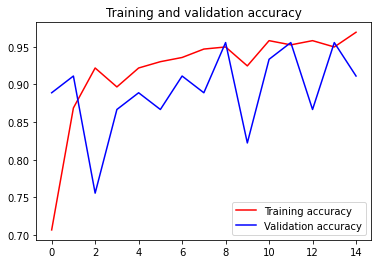

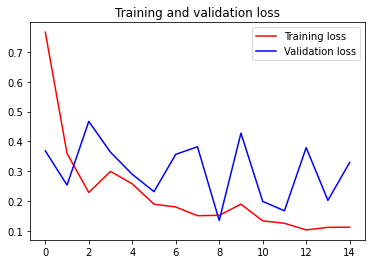

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
saved_model_path = "./Model/model.h5"

model.save(saved_model_path)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('./Model/model.tflite')
tflite_model_file.write_bytes(tflite_model)